In [26]:
import spotipy
import spotipy.util as util
sp = spotipy.Spotify() 
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#set up connection
cid = "<cid>"    # replace with own client_id
secret = "<secret>" # replace with own client_secret
username = ""
    
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

scopes = 'user-library-read playlist-read-private'
token = util.prompt_for_user_token(username, scope= scopes, client_id=cid, client_secret=secret,redirect_uri='http://localhost:8889/')

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)

In [ ]:
#read tracks for playlist of songs i like 
good_playlist = sp.user_playlist("1228577828", "4u91H3eKOM5pDLLxUsbXUz")
good_tracks = good_playlist['tracks']
good_songs = good_tracks['items']
while good_tracks['next']:
    good_tracks = sp.next(good_tracks)
    for item in good_tracks["items"]:
        good_songs.append(item)
good_ids = []
for i in range(len(good_songs)):
    good_ids.append(good_songs[i]['track']['id'])


In [ ]:
#read tracks for playlist of songs i don't like 
bad_playlist = sp.user_playlist("1228577828", "5HOceU82RnWQPbF1iaXQ5r")
bad_tracks = bad_playlist['tracks']
bad_songs = bad_tracks['items']
while bad_tracks['next']:
    bad_tracks = sp.next(bad_tracks)
    for item in bad_tracks["items"]:
        bad_songs.append(item)
bad_ids = []
for i in range(len(bad_songs)):
    bad_ids.append(bad_songs[i]['track']['id'])

In [ ]:
#get features for good playlist and bad playlist    
features = []
for i in range(0, len(good_ids), 50):
    audio_features = sp.audio_features(good_ids[i:i+50])
    for track in audio_features:
        features.append(track)
        features[-1]['target'] = 1          # 1 for like

for i in range(0, len(bad_ids), 50):
    audio_features = sp.audio_features(bad_ids[i:i+50])
    for track in audio_features:
        features.append(track)
        features[-1]['target'] = 0          # 0 for dislike

In [ ]:
#get dict into dataframe of features        
data = pd.DataFrame(features)
data.head()
data[data.target == 1].describe()
data[data.target == 0].describe()
data.head()

data.to_csv('/Users/lalitayang/Documents/K2/Unit 3/spotifydata.csv', index=False)

In [28]:
data = pd.read_csv('/Users/lalitayang/Documents/K2/Unit 3/spotifydata.csv')
data.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,target,tempo,time_signature,track_href,type,uri,valence
0,0.239000,https://api.spotify.com/v1/audio-analysis/1ksY...,0.918,318896,0.436,1ksYsdplUz9eBPqMp3rOHn,0.19400,11,0.1440,-13.160,0,0.0860,1,115.498,4,https://api.spotify.com/v1/tracks/1ksYsdplUz9e...,audio_features,spotify:track:1ksYsdplUz9eBPqMp3rOHn,0.726
1,0.000504,https://api.spotify.com/v1/audio-analysis/0k30...,0.766,175880,0.609,0k30XHFINFgMZbGYFVtgHn,0.00000,8,0.0895,-3.901,1,0.0377,1,101.012,4,https://api.spotify.com/v1/tracks/0k30XHFINFgM...,audio_features,spotify:track:0k30XHFINFgMZbGYFVtgHn,0.542
2,0.049600,https://api.spotify.com/v1/audio-analysis/5lIW...,0.793,209299,0.656,5lIWtgvDTAh37jdp1FjXHB,0.02570,0,0.1160,-7.379,0,0.0435,1,124.005,4,https://api.spotify.com/v1/tracks/5lIWtgvDTAh3...,audio_features,spotify:track:5lIWtgvDTAh37jdp1FjXHB,0.366
3,0.211000,https://api.spotify.com/v1/audio-analysis/6a85...,0.566,265881,0.733,6a85nwEN0YGiZ5ktTRuXDe,0.00000,9,0.0902,-5.079,0,0.3500,1,92.296,4,https://api.spotify.com/v1/tracks/6a85nwEN0YGi...,audio_features,spotify:track:6a85nwEN0YGiZ5ktTRuXDe,0.807
4,0.214000,https://api.spotify.com/v1/audio-analysis/7o2O...,0.676,182772,0.584,7o2OlQJYtuBPvJmTf2E0FF,0.00132,1,0.0910,-5.788,1,0.1550,1,177.962,4,https://api.spotify.com/v1/tracks/7o2OlQJYtuBP...,audio_features,spotify:track:7o2OlQJYtuBPvJmTf2E0FF,0.768


In [30]:
#get names of features and drop variables
feature_names = data.columns
feature_names = feature_names.drop(['analysis_url', 'id', 'target', 'track_href', 'uri', 'type'])
feature_names


Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

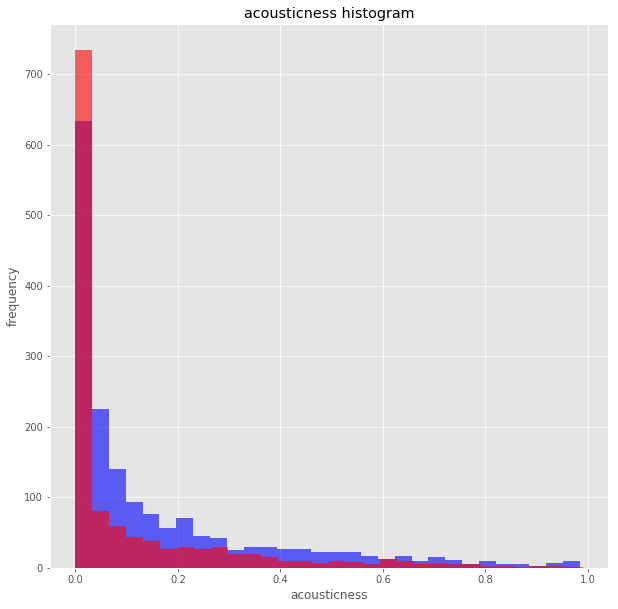

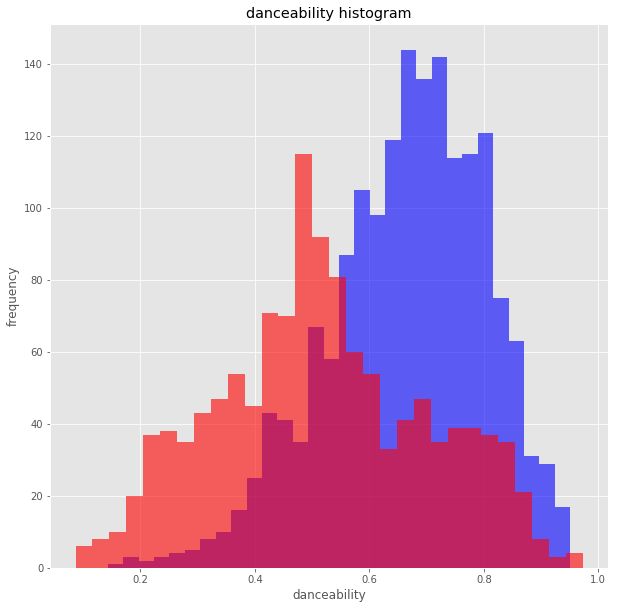

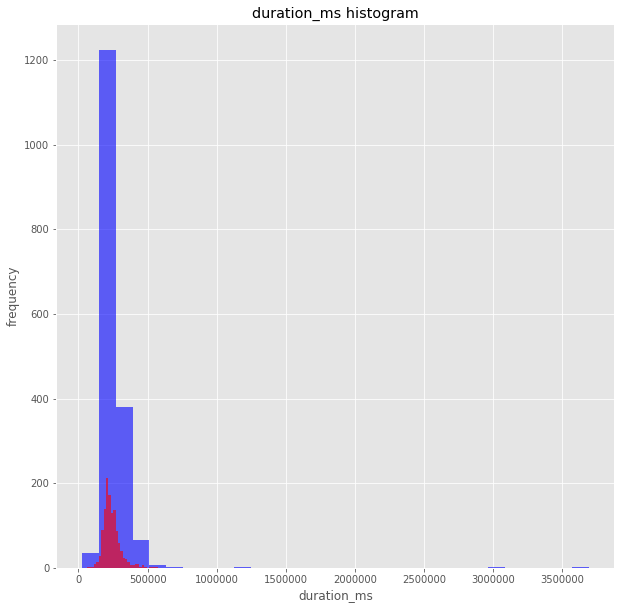

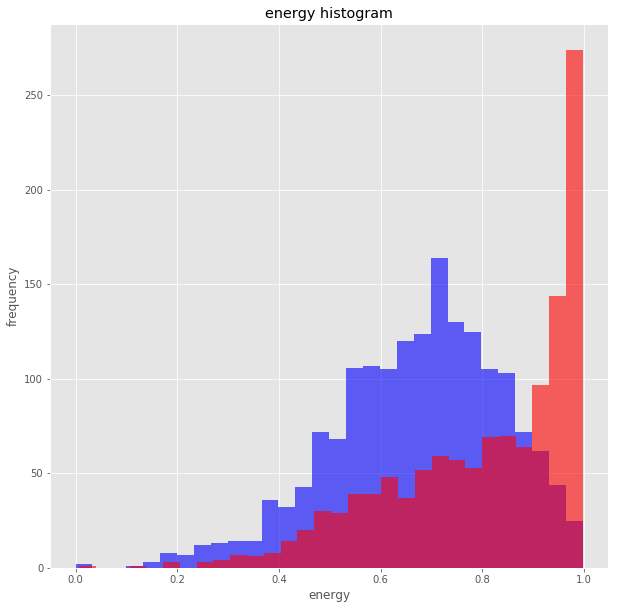

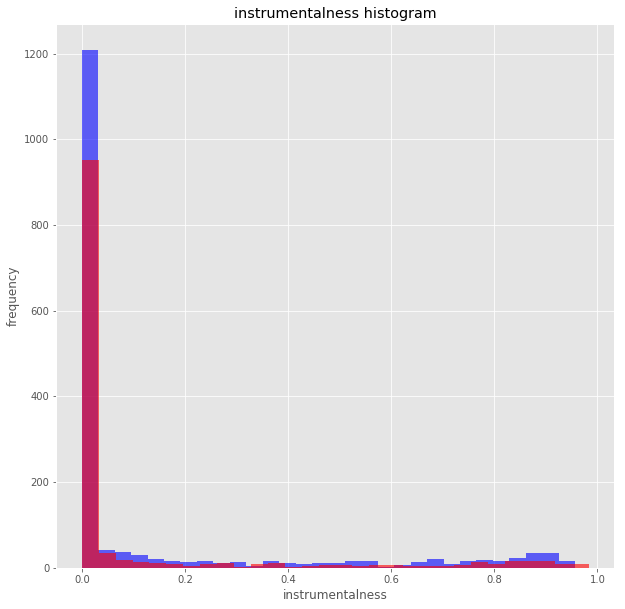

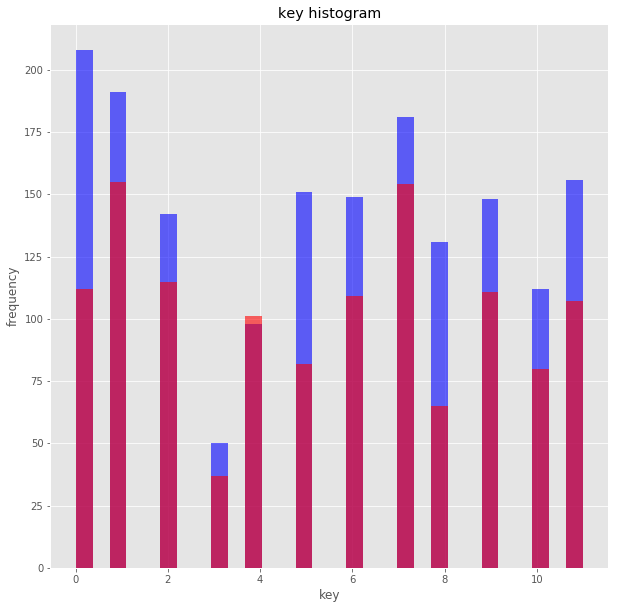

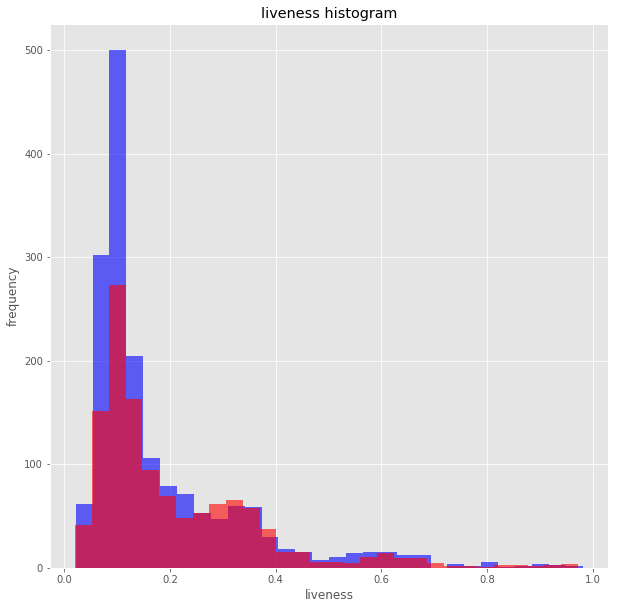

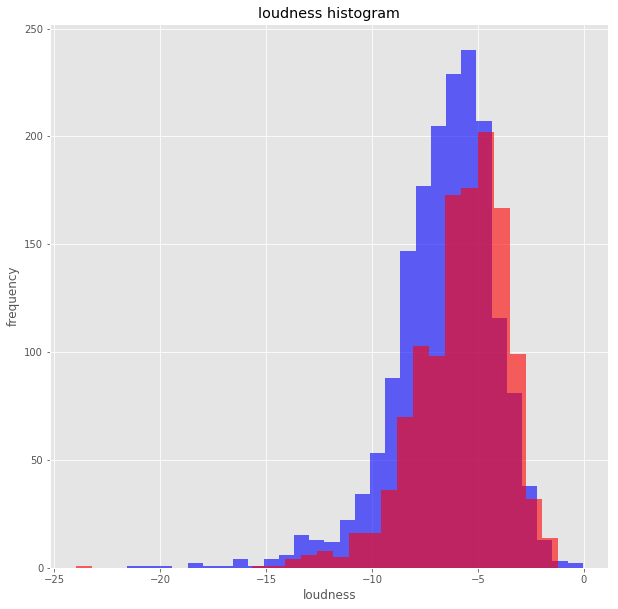

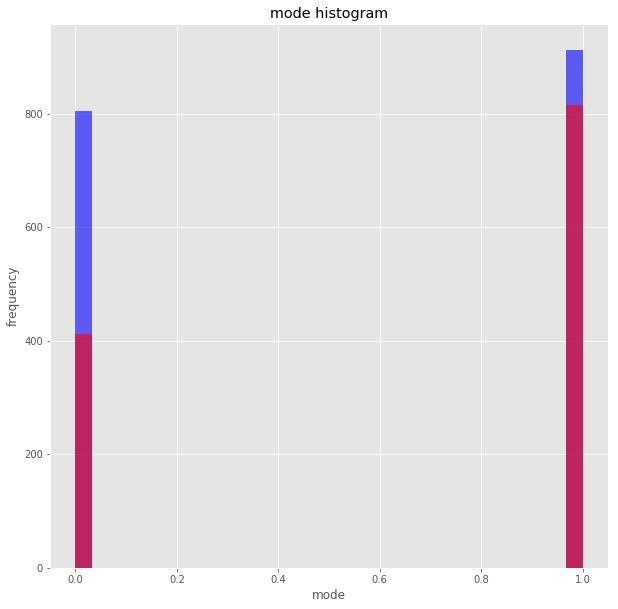

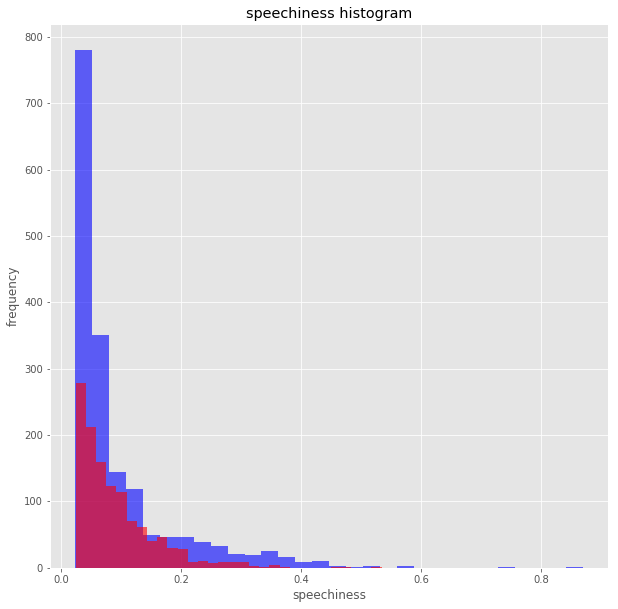

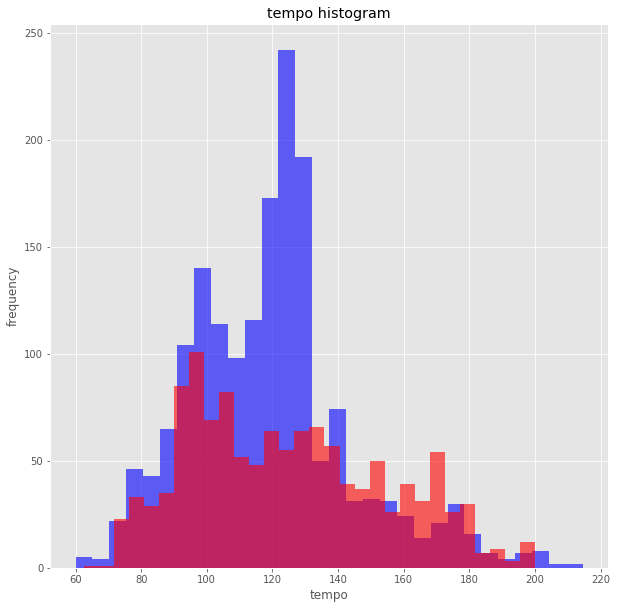

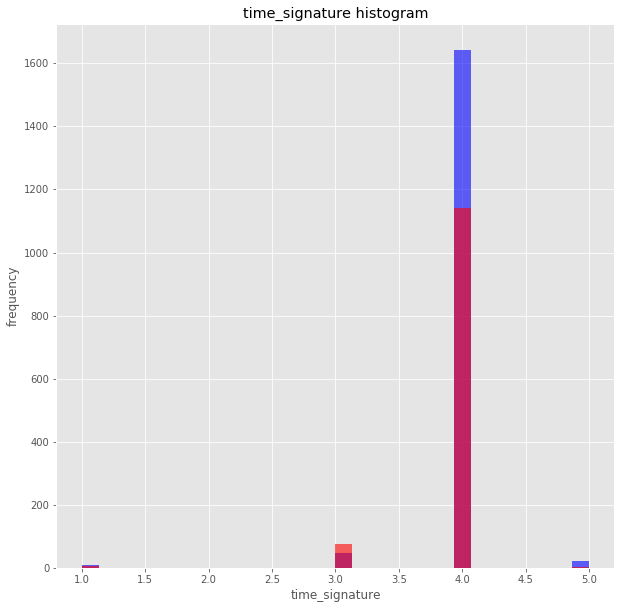

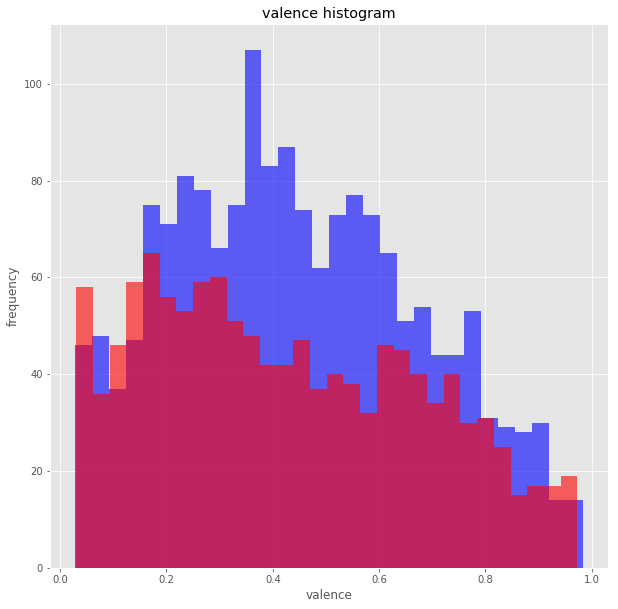

In [31]:
# plot each audio feature and save
plt.style.use('ggplot')

for feature in feature_names:
    plt.figure(figsize=(10,10))
    plt.hist(data[data.target==1][feature], color='blue', alpha=.60, bins=30) #like
    plt.hist(data[data.target==0][feature], color='red', alpha=.60, bins=30)  #don't like
    plt.title(feature+' histogram')
    plt.xlabel(feature)
    plt.ylabel('frequency')
    #plt.savefig('/Users/lalitayang/Documents/K2/Unit 3/'+ feature +'.png', bbox_inches='tight')
    plt.show()

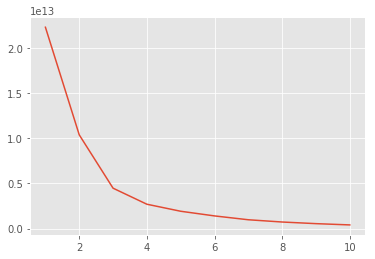

In [32]:
# KMeans clustering    
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.25, random_state=21)

inertia = []
for n in range(1,11):
    model = KMeans(n_clusters=n)
    model.fit(train[feature_names])
    inertia.append(model.inertia_)

# graph elbow plot
plt.plot(range(1,11), inertia)
plt.show()

In [33]:
# calculate inertia
model = KMeans(n_clusters=3)
model.fit(train[feature_names])
print(model.inertia_)

4.46771571432e+12


In [34]:
labels = model.predict(train[feature_names])
train['label'] = labels

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [35]:
# crosstab
df = pd.DataFrame({'labels':labels, 'target':train['target']})
ct = pd.crosstab(df['labels'], df['target'])
print(ct)

target    0    1
labels          
0       163  291
1         0    1
2       763  990


In [36]:
# Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
mat = train[feature_names].as_matrix()

# ward linkage
hac_ward = AgglomerativeClustering(linkage='ward', n_clusters=3).fit(mat)
ward_labels = hac_ward.labels_

df = pd.DataFrame({'labels':ward_labels, 'target':train['target']})
ct = pd.crosstab(df['labels'], df['target'])
print(ct)

target    0    1
labels          
0       181  316
1         0    1
2       745  965


In [37]:
# average linkage
hac_avg = AgglomerativeClustering(linkage='average', n_clusters=2).fit(mat)
avg_labels = hac_avg.labels_

df = pd.DataFrame({'labels':avg_labels, 'target':train['target']})
ct = pd.crosstab(df['labels'], df['target'])
print(ct)

target    0     1
labels           
0       926  1281
1         0     1


In [38]:
# complete linkage
hac_comp = AgglomerativeClustering(linkage='complete', n_clusters=2).fit(mat)
comp_labels = hac_comp.labels_

df = pd.DataFrame({'labels':comp_labels, 'target':train['target']})
ct = pd.crosstab(df['labels'], df['target'])
print(ct)

target    0     1
labels           
0       926  1281
1         0     1
